### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Calcular el ingreso total de cada tienda.

ingreso_total_t1 = tienda['Precio'].sum()
ingreso_total_t2 = tienda2['Precio'].sum()
ingreso_total_t3 = tienda3['Precio'].sum()
ingreso_total_t4 = tienda4['Precio'].sum()

print(f"Ingreso total Tienda 1: {ingreso_total_t1:,.2f}")
print(f"Ingreso total Tienda 2: {ingreso_total_t2:,.2f}")
print(f"Ingreso total Tienda 3: {ingreso_total_t3:,.2f}")
print(f"Ingreso total Tienda 4: {ingreso_total_t4:,.2f}")

Ingreso total Tienda 1: 1,150,880,400.00
Ingreso total Tienda 2: 1,116,343,500.00
Ingreso total Tienda 3: 1,098,019,600.00
Ingreso total Tienda 4: 1,038,375,700.00


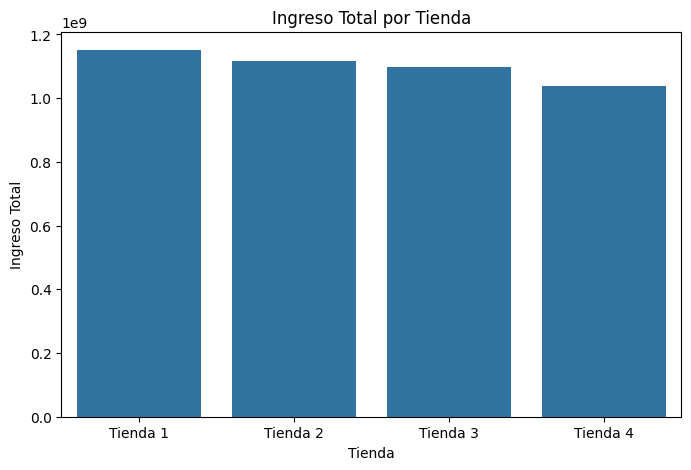

In [ ]:
# Visualización de los resultados

import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de ingreso total por tienda
ingreso_total_df = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total': [ingreso_total_t1, ingreso_total_t2, ingreso_total_t3, ingreso_total_t4]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Tienda', y='Ingreso Total', data=ingreso_total_df)
plt.title('Ingreso Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total')
plt.show()

# 2. Ventas por categoría

In [ ]:
lista_tiendas=[(1,tienda),(2,tienda2),(3,tienda3),(4,tienda4)]
for i in lista_tiendas:
  print(f"\nTienda {i[0]} - No. de ventas por categoría:\n")
  venta_por_categoria=i[1].groupby('Categoría del Producto')['Producto'].count().reset_index(name="Numero de ventas")
  print(venta_por_categoria)
  total_de_ventas=venta_por_categoria['Numero de ventas'].sum()
  print(f"\nTotal de ventas: {total_de_ventas}")


Tienda 1 - No. de ventas por categoría:

    Categoría del Producto  Numero de ventas
0  Artículos para el hogar               171
1     Deportes y diversión               284
2        Electrodomésticos               312
3             Electrónicos               448
4   Instrumentos musicales               182
5                 Juguetes               324
6                   Libros               173
7                  Muebles               465

Total de ventas: 2359

Tienda 2 - No. de ventas por categoría:

    Categoría del Producto  Numero de ventas
0  Artículos para el hogar               181
1     Deportes y diversión               275
2        Electrodomésticos               305
3             Electrónicos               422
4   Instrumentos musicales               224
5                 Juguetes               313
6                   Libros               197
7                  Muebles               442

Total de ventas: 2359

Tienda 3 - No. de ventas por categoría:

    Categoría del 

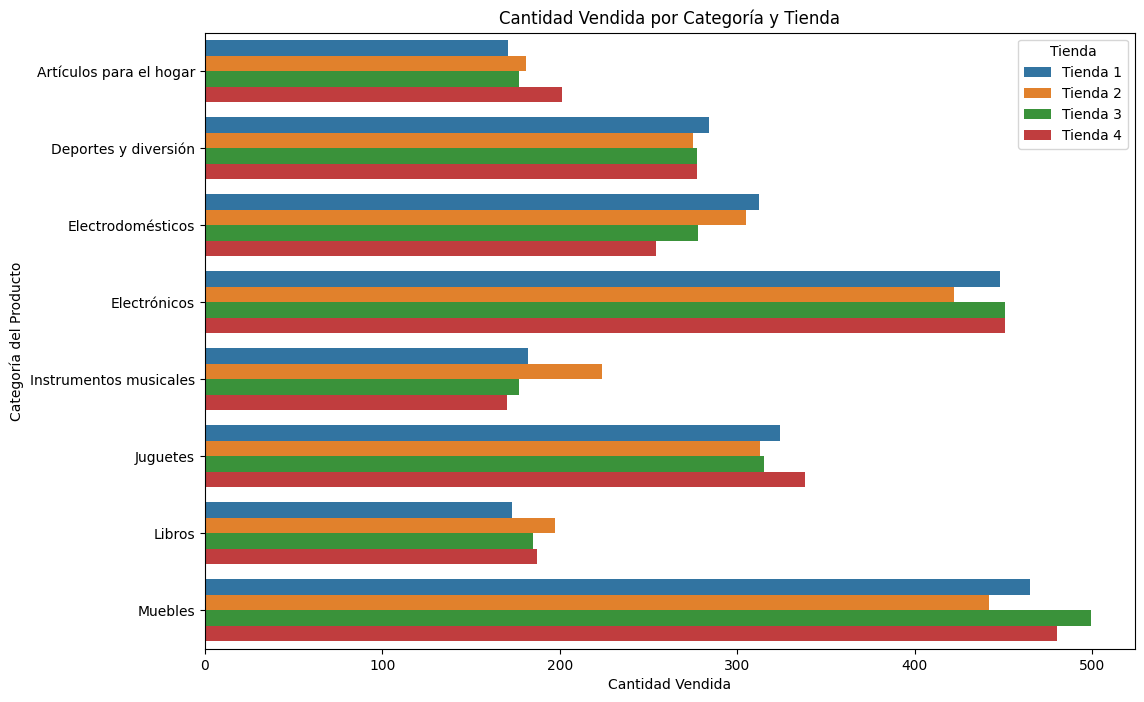

In [ ]:
# Grafico con la cantidad vendida por categoria de cada tienda.

# Análisis conjunto de las 4 tiendas
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

todas_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular la cantidad vendida por categoría para cada tienda
ventas_por_categoria_tienda = todas_tiendas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')

# Generar el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='Cantidad Vendida', y='Categoría del Producto', hue='Tienda', data=ventas_por_categoria_tienda)
plt.title('Cantidad Vendida por Categoría y Tienda')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Categoría del Producto')
plt.legend(title='Tienda')
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
# Calcular la calificación promedio de los clientes para cada tienda

calificacion_promedio_t1 = tienda['Calificación'].mean()
calificacion_promedio_t2 = tienda2['Calificación'].mean()
calificacion_promedio_t3 = tienda3['Calificación'].mean()
calificacion_promedio_t4 = tienda4['Calificación'].mean()

print(f"Calificación promedio Tienda 1: {calificacion_promedio_t1:.2f}")
print(f"Calificación promedio Tienda 2: {calificacion_promedio_t2:.2f}")
print(f"Calificación promedio Tienda 3: {calificacion_promedio_t3:.2f}")
print(f"Calificación promedio Tienda 4: {calificacion_promedio_t4:.2f}")

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


# 4. Productos más y menos vendidos


Estos son los 5 productos más vendidos de la Tienda 1:


,count
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56



Estos son los 5 productos menos vendidos de la Tienda 1:


,count
Producto,
Ciencia de datos con Python,39
Pandereta,36
Olla de presión,35
Auriculares con micrófono,33
Celular ABXY,33


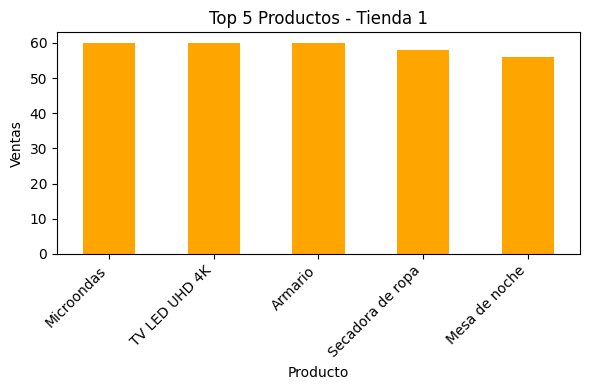


Estos son los 5 productos más vendidos de la Tienda 2:


,count
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Guitarra acústica,58
Pandereta,58



Estos son los 5 productos menos vendidos de la Tienda 2:


,count
Producto,
Auriculares,37
Sillón,35
Mesa de comedor,34
Impresora,34
Juego de mesa,32


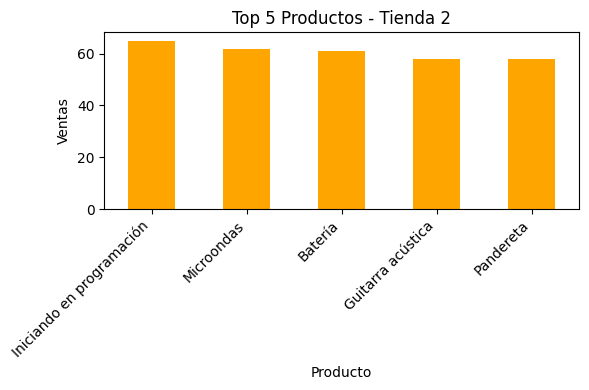


Estos son los 5 productos más vendidos de la Tienda 3:


,count
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55



Estos son los 5 productos menos vendidos de la Tienda 3:


,count
Producto,
Guitarra eléctrica,38
Set de vasos,36
Mochila,36
Microondas,36
Bloques de construcción,35


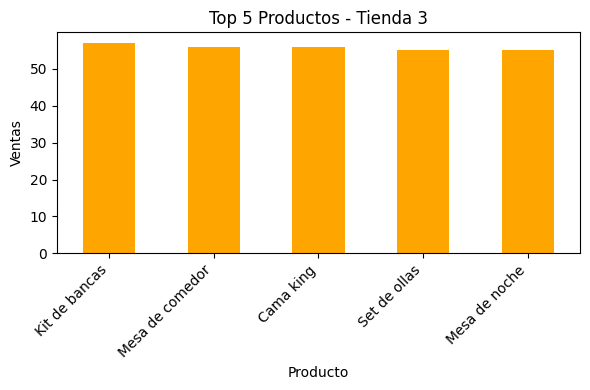


Estos son los 5 productos más vendidos de la Tienda 4:


,count
Producto,
Cama box,62
Cubertería,59
Dashboards con Power BI,56
Cama king,56
Carrito de control remoto,55



Estos son los 5 productos menos vendidos de la Tienda 4:


,count
Producto,
Refrigerador,38
Ciencia de datos con Python,38
Guitarra acústica,37
Armario,34
Guitarra eléctrica,33


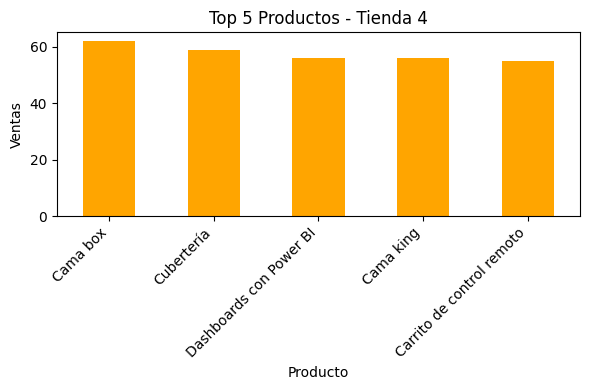

In [ ]:
# Productos más vendidos y menos vendidos en cada tienda.

tiendas={"Tienda 1":tienda,"Tienda 2":tienda2,"Tienda 3":tienda3,"Tienda 4":tienda4}
mas_vendidos={}
menos_vendidos={}

for i, (nombre, df) in enumerate(tiendas.items()):
    mas_vendidos[nombre] = df['Producto'].value_counts().head(5)
    menos_vendidos[nombre] = df['Producto'].value_counts().tail(5)

    print(f"\nEstos son los 5 productos más vendidos de la {nombre}:")
    display(mas_vendidos[nombre])
    print(f"\nEstos son los 5 productos menos vendidos de la {nombre}:")
    display(menos_vendidos[nombre])

    plt.figure(figsize=(6,4))

    mas_vendidos[nombre].plot(kind='bar', color=['orange'])

    plt.title(f'Top 5 Productos - {nombre}')
    plt.xlabel('Producto')
    plt.ylabel('Ventas')

    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()

    plt.show()

# 5. Envío promedio por tienda

In [ ]:
# Calcular el costo de envío promedio para cada tienda.
def calcular_costo_envio(lista_tiendas):
  costos_lista=[]
  for i in (lista_tiendas):
    costo_envio=i[1]["Costo de envío"].mean().round(2)
    tienda=f"Tienda {i[0]}"
    costos_lista.append({'Tienda':tienda,'Costo promedio':costo_envio})
    costos_df=pd.DataFrame(costos_lista)
  display(costos_df)
  return costos_lista


costos_lista=calcular_costo_envio(lista_tiendas)

,Tienda,Costo promedio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


# 6 Analisis por ubicacion

In [ ]:
# Mapa centrado en los datos obtenidos
m1 = folium.Map(location=[tienda['lat'].mean(), tienda['lon'].mean()], zoom_start=5)
m2 = folium.Map(location=[tienda2['lat'].mean(), tienda2['lon'].mean()], zoom_start=5)
m3 = folium.Map(location=[tienda3['lat'].mean(), tienda3['lon'].mean()], zoom_start=5)
m4 = folium.Map(location=[tienda4['lat'].mean(), tienda4['lon'].mean()], zoom_start=5)

heat_data_t1 = [[row['lat'], row['lon'], row['Precio']] for index, row in tienda.dropna(subset=['lat', 'lon', 'Precio']).iterrows() if row['Precio'] > 0]
heat_data_t2 = [[row['lat'], row['lon'], row['Precio']] for index, row in tienda2.dropna(subset=['lat', 'lon', 'Precio']).iterrows() if row['Precio'] > 0]
heat_data_t3 = [[row['lat'], row['lon'], row['Precio']] for index, row in tienda3.dropna(subset=['lat', 'lon', 'Precio']).iterrows() if row['Precio'] > 0]
heat_data_t4 = [[row['lat'], row['lon'], row['Precio']] for index, row in tienda4.dropna(subset=['lat', 'lon', 'Precio']).iterrows() if row['Precio'] > 0]


# Heatmap para cada tienda
if heat_data_t1:
  HeatMap(heat_data_t1).add_to(m1)
  print("Mapa de calor para Tienda 1:")
  display(m1)
else:
  print("No hay datos válidos para crear el mapa de calor para Tienda 1.")

if heat_data_t2:
  HeatMap(heat_data_t2).add_to(m2)
  print("Mapa de calor para Tienda 2:")
  display(m2)
else:
  print("No hay datos válidos para crear el mapa de calor para Tienda 2.")

if heat_data_t3:
  HeatMap(heat_data_t3).add_to(m3)
  print("Mapa de calor para Tienda 3:")
  display(m3)
else:
  print("No hay datos válidos para crear el mapa de calor para Tienda 3.")

if heat_data_t4:
  HeatMap(heat_data_t4).add_to(m4)
  print("Mapa de calor para Tienda 4:")
  display(m4)
else:
  print("No hay datos válidos para crear el mapa de calor para Tienda 4.")


Mapa de calor para Tienda 1:


Mapa de calor para Tienda 2:


Mapa de calor para Tienda 3:


Mapa de calor para Tienda 4:


In [ ]:
# Marcadores con ventas de acuerdo a cada tienda

m_t1 = folium.Map(location=[tienda['lat'].mean(), tienda['lon'].mean()], zoom_start=5)
m_t2 = folium.Map(location=[tienda2['lat'].mean(), tienda2['lon'].mean()], zoom_start=5)
m_t3 = folium.Map(location=[tienda3['lat'].mean(), tienda3['lon'].mean()], zoom_start=5)
m_t4 = folium.Map(location=[tienda4['lat'].mean(), tienda4['lon'].mean()], zoom_start=5)

store_maps = {
    'Tienda 1': (tienda, m_t1),
    'Tienda 2': (tienda2, m_t2),
    'Tienda 3': (tienda3, m_t3),
    'Tienda 4': (tienda4, m_t4)
}

for store_name, (df, current_map) in store_maps.items():
    df_cleaned = df.dropna(subset=['lat', 'lon', 'Precio'])
    df_cleaned = df_cleaned[df_cleaned['Precio'] > 0]

    # Precio del total de ventas en cada locación
    store_locations_sales = df_cleaned.groupby(['lat', 'lon'])['Precio'].sum().reset_index()

    for index, row in store_locations_sales.iterrows():
        folium.Marker(
            location=[row['lat'], row['lon']],
            popup=f"<b>{store_name}</b><br>Ventas Totales en esta ubicación: {row['Precio']:,.2f}",
            tooltip=f"{store_name}: {row['Precio']:,.2f} ventas"
        ).add_to(current_map)

    print(f"Mapa con ventas por ubicación para {store_name}:")
    display(current_map)

Mapa con ventas por ubicación para Tienda 1:


Mapa con ventas por ubicación para Tienda 2:


Mapa con ventas por ubicación para Tienda 3:


Mapa con ventas por ubicación para Tienda 4:


# 7. Informe Final

De acuerdo a los datos analizados la tienda 4 parece ser la menos eficiente en términos de rentabilidad y satisfacción del cliente.

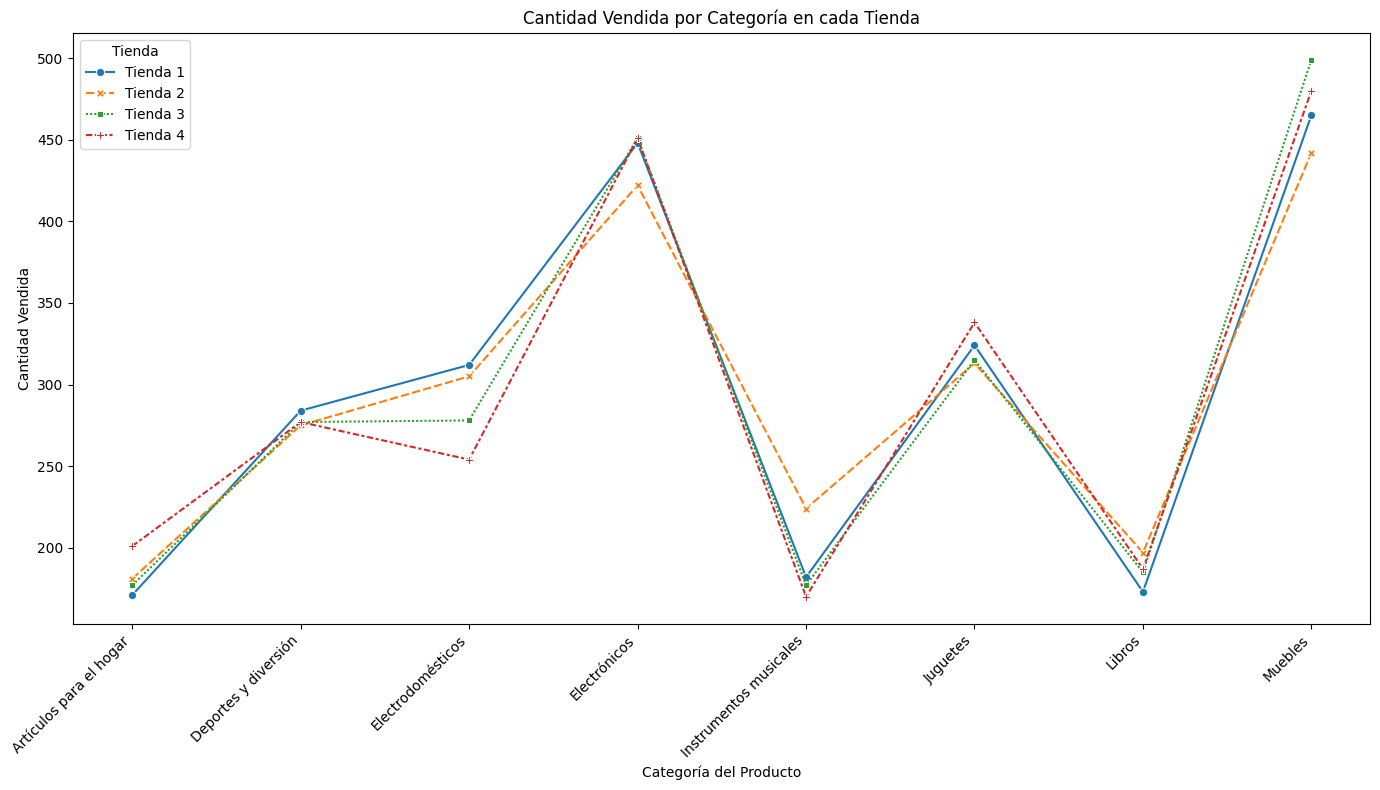

In [ ]:
# Cantidad vendida por categoría en cada tienda

# Agrupar por Tienda y Categoría del Producto, contando las ventas
ventas_categoria_linea = todas_tiendas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')

ventas_categoria_pivot = ventas_categoria_linea.pivot(index='Categoría del Producto', columns='Tienda', values='Cantidad Vendida').fillna(0)

# Generar el gráfico de líneas
plt.figure(figsize=(14, 8))
sns.lineplot(data=ventas_categoria_pivot, markers=True)
plt.title('Cantidad Vendida por Categoría en cada Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()